In [12]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

from Modelisation import Maillage, Create_graph, Chemin_optimal #Bellman
from Drawing_functions import draw_paris_street, draw_graph, draw_chemin 

In [ ]:
def Bellman(G):
    vertices = list(G.nodes())
    n = len(vertices)

    # Initialisation
    father = []
    pi = [float('inf')] * n
    pi[0] = 0
    l_max = 4

    l = [0] * n
    horizontal = True

    # Itération
    for j in range(1, n):
        y = vertices[j]
        C_min = float('inf')
        k_min = -1

        for x in G.predecessors(y):
            k = vertices.index(x)
            
            if horizontal and x[1] == y[1]:
                l[j] = l[k] + 1
                coude = 0
            elif not horizontal and x[1] == y[1]:
                l[j] = 1
                coude = 1
            elif not horizontal and x[1] != y[1]:
                l[j] = 0
                coude = 0
            else:
                l[j] = 0
                coude = 1

            if l[j] == l_max:
                continue

            cout = pi[k] + G[x][y]['weight'] + coude

            if cout <= C_min:
                C_min = cout
                k_min = k
                length = l[j]
        
        horizontal = (vertices[k_min][1] == y[1])

        pi[j] = C_min
        father.append(k_min)
        l[j] = length

    return father


## 1) Modélisation

In [14]:
points, n, m = Maillage()
G = Create_graph(points, n, m)
father = Bellman(G)
chemin = Chemin_optimal(father)

## 2) Présentation

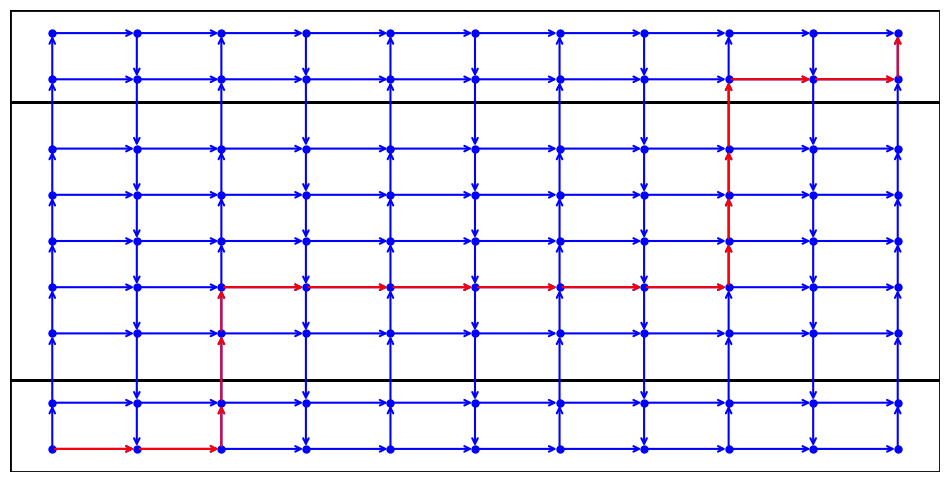

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
draw_paris_street(fig, ax)
draw_graph(fig, ax, G)
draw_chemin(fig, ax, G, chemin)
plt.show()